# Xadrez

reconhecimento de peças de xadrez usando OpenCV e template matching

## Referência de jogo:
- https://www.chess.com/pt/play/computer

In [2]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt


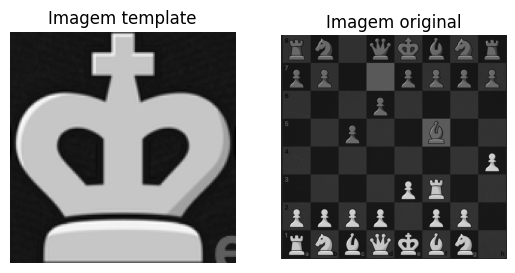

In [3]:
# Carrega as imagens
template = cv2.imread('templates/rei.png', 0) 
tabuleiro = cv2.imread('imgs/tabuleiro.png')                  
tabuleiro_gray = cv2.cvtColor(tabuleiro, cv2.COLOR_BGR2GRAY)



plt.subplot(121)
plt.title("Imagem template")
plt.imshow(template, cmap="gray")
plt.axis('off')
plt.subplot(122)
plt.title("Imagem original")
plt.imshow(tabuleiro_gray, cmap="gray")
plt.axis('off')
plt.show()

Desenhados 1 retângulos após filtrar correspondências sobrepostas


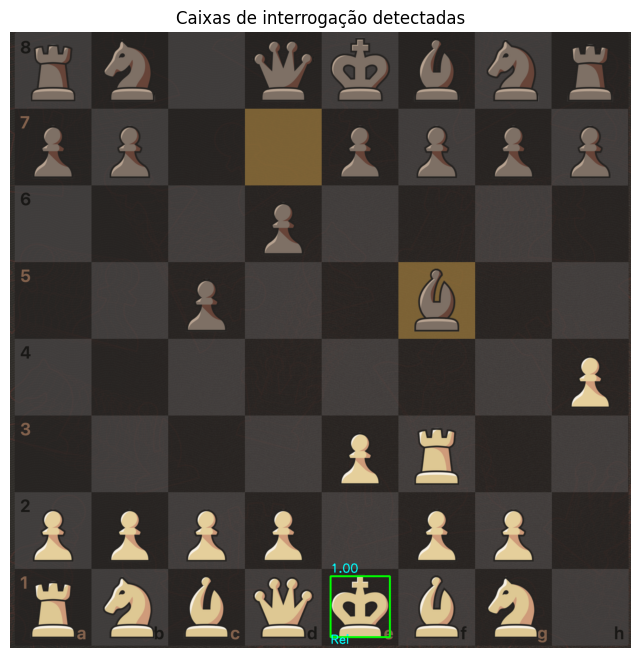

In [3]:
# limiar
threshold = 0.99

# template matching
res = cv2.matchTemplate(tabuleiro_gray, template, cv2.TM_CCOEFF_NORMED)

# Encontra localizações onde a correlação é maior que o threshold
loc= np.where(res >= threshold)

count = 0
for pt in zip(*loc[::-1]):  # [::-1] inverte as coordenadas para formato (x,y)
    cv2.rectangle(tabuleiro, pt,(pt[0] + template.shape[1], pt[1] + template.shape[0]), (0, 255, 0), 3)
    cv2.putText(tabuleiro, f'{res[pt[1], pt[0]]:.2f}', (pt[0], pt[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 0), 2)
    cv2.putText(tabuleiro, f'Rei', (pt[0], pt[1] + template.shape[1] + 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 0), 2)
    count += 1

print(f"Desenhados {count} retângulos após filtrar correspondências sobrepostas")

# Exibe o resultado
plt.figure(figsize=(12, 8))
plt.title(f"Caixas de interrogação detectadas")
plt.imshow(cv2.cvtColor(tabuleiro, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Detectar apenas uma peça é simples, vamos testar para mais de uma peça. 

Desenhados 8 retângulos após filtrar correspondências sobrepostas


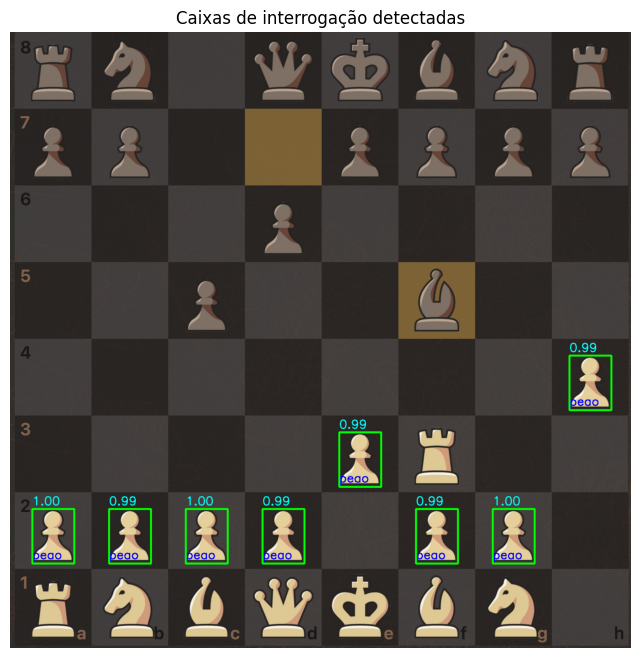

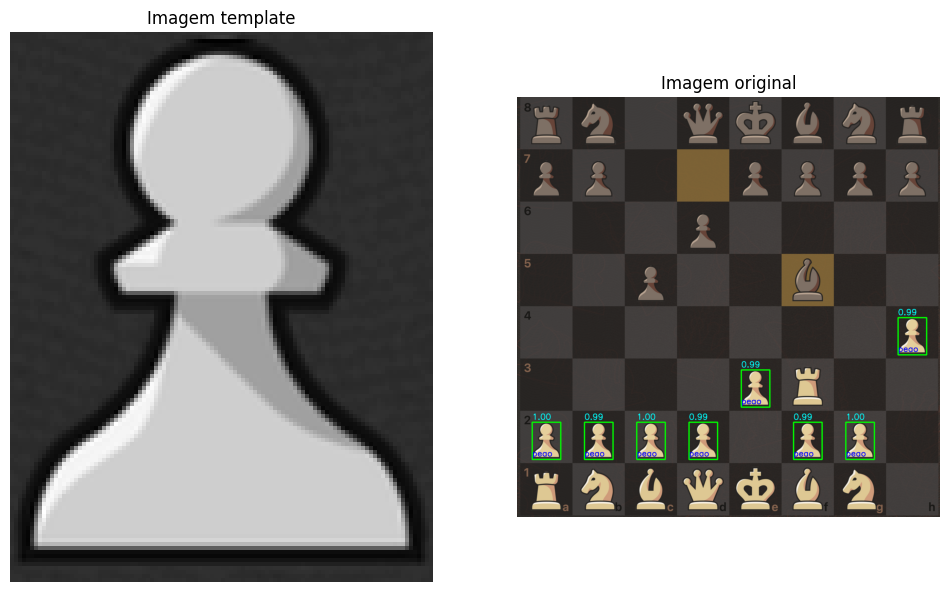

In [4]:
# Carrega as imagens
template = cv2.imread('templates/peao.png', 0) 
tabuleiro = cv2.imread('imgs/tabuleiro.png')                  
tabuleiro_gray = cv2.cvtColor(tabuleiro, cv2.COLOR_BGR2GRAY)

# limiar
threshold = 0.99

# template matching
res = cv2.matchTemplate(tabuleiro_gray, template, cv2.TM_CCOEFF_NORMED)

# Encontra localizações onde a correlação é maior que o threshold
loc= np.where(res >= threshold)

count = 0
for pt in zip(*loc[::-1]):  # [::-1] inverte as coordenadas para formato (x,y)
    cv2.rectangle(tabuleiro, pt,(pt[0] + template.shape[1], pt[1] + template.shape[0]), (0, 255, 0), 3)
    cv2.putText(tabuleiro, f'{res[pt[1], pt[0]]:.2f}', (pt[0], pt[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 0), 2)
    cv2.putText(tabuleiro, f'peao', (pt[0], pt[1] + template.shape[1] + 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
    count += 1

print(f"Desenhados {count} retângulos após filtrar correspondências sobrepostas")

# Exibe o resultado
plt.figure(figsize=(12, 8))
plt.title(f"Caixas de interrogação detectadas")
plt.imshow(cv2.cvtColor(tabuleiro, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

plt.figure(figsize=(12, 8))
plt.subplot(121)
plt.title("Imagem template")
plt.imshow(template, cmap="gray")
plt.axis('off')
plt.subplot(122)
plt.title("Imagem original")
plt.imshow(cv2.cvtColor(tabuleiro, cv2.COLOR_BGR2RGB))
plt.axis('off')


plt.show()

OK. agora a ideia é automatizar para encontrar os matches em uma lista de templates 

aqui não existe um formato único e correto, vai depender do que você quer obter como resultado.

vou carregar todos os templates, vou usar um dicionario por facilidade. 

A funçao de template vai retornar uma lista de dicionarios com:
- a posiçao, 
- o score e 
- o nome. 

Esse formato estou aproveitando de como uma rede neural retorna geralmente. 

temos 17 matches no total
[{'x': 809, 'y': 1376, 'w': 150, 'h': 154, 'confidence': 0.98203737, 'name': 'rei'}, {'x': 810, 'y': 1376, 'w': 150, 'h': 154, 'confidence': 0.9999869, 'name': 'rei'}, {'x': 811, 'y': 1376, 'w': 150, 'h': 154, 'confidence': 0.98197263, 'name': 'rei'}, {'x': 1414, 'y': 818, 'w': 106, 'h': 138, 'confidence': 0.9944777, 'name': 'peao'}, {'x': 832, 'y': 1012, 'w': 106, 'h': 138, 'confidence': 0.99441326, 'name': 'peao'}, {'x': 55, 'y': 1206, 'w': 106, 'h': 138, 'confidence': 0.9814493, 'name': 'peao'}, {'x': 56, 'y': 1206, 'w': 106, 'h': 138, 'confidence': 0.9998487, 'name': 'peao'}, {'x': 57, 'y': 1206, 'w': 106, 'h': 138, 'confidence': 0.9815125, 'name': 'peao'}, {'x': 250, 'y': 1206, 'w': 106, 'h': 138, 'confidence': 0.99402326, 'name': 'peao'}, {'x': 443, 'y': 1206, 'w': 106, 'h': 138, 'confidence': 0.98147523, 'name': 'peao'}, {'x': 444, 'y': 1206, 'w': 106, 'h': 138, 'confidence': 0.99998194, 'name': 'peao'}, {'x': 445, 'y': 1206, 'w': 106, 'h': 138, 'confid

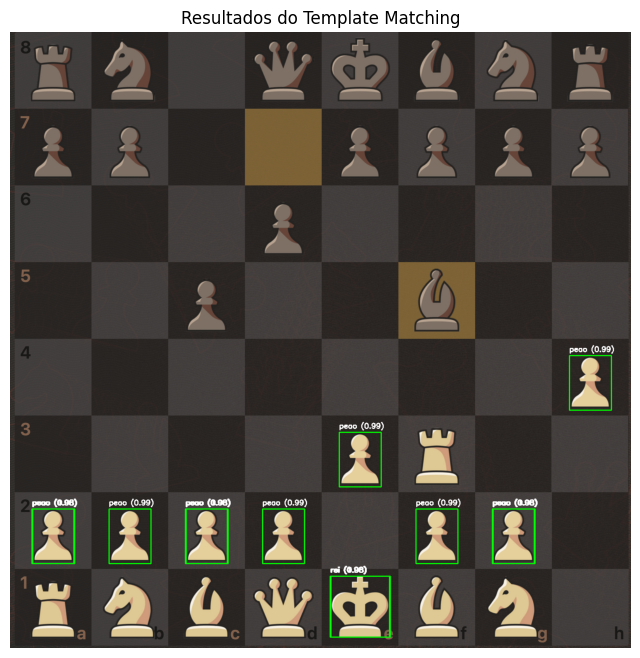

In [6]:
def template_matching(tabuleiro_gray, template_gray, template_name, threshold):
    res = cv2.matchTemplate(tabuleiro_gray, template_gray, cv2.TM_CCOEFF_NORMED)
    loc = np.where(res >= threshold)
    
    matches = []
    for pt in zip(*loc[::-1]):  
        matches.append({
            'x': pt[0],
            'y': pt[1],
            'w': template_gray.shape[1],
            'h': template_gray.shape[0],   
            'confidence': res[pt[1], pt[0]],
            'name': template_name
        })          
    return matches

# Carrega tabuleiro
tabuleiro = cv2.imread('imgs/tabuleiro.png')                     
tabuleiro_gray = cv2.cvtColor(tabuleiro, cv2.COLOR_BGR2GRAY)

# Carrega templates
templates = {
    'rei': cv2.imread('templates/rei.png', 0),
    'peao': cv2.imread('templates/peao.png', 0)
}

threshold = 0.98

matches = []
for nome, template in templates.items():
    resultados = template_matching(tabuleiro_gray, template, nome, threshold)
    matches.extend(resultados) # Adiciona os resultados de cada template à lista geral

print(f"temos {len(matches)} matches no total")
print(matches)

# Exibe os resultados
for pt in matches:
    x, y, w, h = pt['x'], pt['y'], pt['w'], pt['h']
    nome = pt['name']
    conf = pt['confidence']

    cv2.rectangle(tabuleiro, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.putText(tabuleiro, f'{nome} ({conf:.2f})', (x, y - 10),cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

# Exibição com matplotlib
plt.figure(figsize=(12, 8))
plt.title("Resultados do Template Matching")
plt.imshow(cv2.cvtColor(tabuleiro, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()



Minimamente já está funcionando, mas uma coisa está me incomodando, foram detectados muitos objetos mais que o dobro, ou seja, não temos tudo isso. 

Isso acontece pois temos sobreposições redundantes sendo detectadas. Uma forma de ajustar, é usar o algoritmo famoso chamdo supressor de não máximos, NMS (Non-Maximum Suppression) que remove detecções redundantes sobrepostas, mantendo apenas a de maior confiança dentro de cada região.

Vou aproveitar pra explicar como ele funciona. 
- Ordena os matches pela confiança (pontuação).
- Compara cada match com os demais.
- Remove os que tiverem grande sobreposição com um mais confiável (usando IoU – Interseção sobre União).

Referência: [https://pyimagesearch.com/2015/02/16/faster-non-maximum-suppression-python/](https://pyimagesearch.com/2015/02/16/faster-non-maximum-suppression-python/)

com NMS temos 9 matches


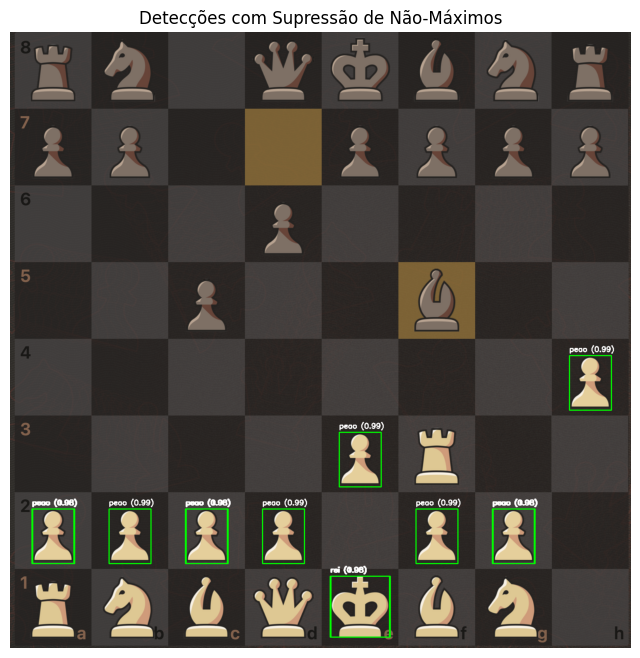

In [7]:
# Non-Maximum Suppression
def non_max_suppression(matches, overlap_threshold=0.3):

    # Ordena os matches pela confiança (pontuação)
    matches = sorted(matches, key=lambda x: x['confidence'], reverse=True)
    
    filtered_matches = []

    for match in matches:
        x, y, w, h = match['x'], match['y'], match['w'], match['h']
        
        # Verifica sobreposição com matches já aceitos
        is_overlapping = False
        for accepted in filtered_matches:
            ax, ay, aw, ah = accepted['x'], accepted['y'], accepted['w'], accepted['h']
            
            # Calcula interseção
            x_overlap = max(0, min(x + w, ax + aw) - max(x, ax))
            y_overlap = max(0, min(y + h, ay + ah) - max(y, ay))
            overlap_area = x_overlap * y_overlap
            
            # Calcula área da união
            union_area = (w * h) + (aw * ah) - overlap_area
            
            # Se a sobreposição for muito grande, rejeita
            if overlap_area / union_area > overlap_threshold:
                is_overlapping = True
                break
        
        if not is_overlapping:
            filtered_matches.append(match)
    
    return filtered_matches


# Aplica NMS
final_matches = non_max_suppression(matches, overlap_threshold=0.3)

print(f"com NMS temos {len(final_matches)} matches")

# Exibe os resultados finais
for pt in final_matches:
    x, y, w, h = pt['x'], pt['y'], pt['w'], pt['h']
    nome = pt['name']
    conf = pt['confidence']

    cv2.rectangle(tabuleiro, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.putText(tabuleiro, f'{nome} ({conf:.2f})', (x, y - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

plt.figure(figsize=(12, 8))
plt.title("Detecções com Supressão de Não-Máximos")
plt.imshow(cv2.cvtColor(tabuleiro, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()




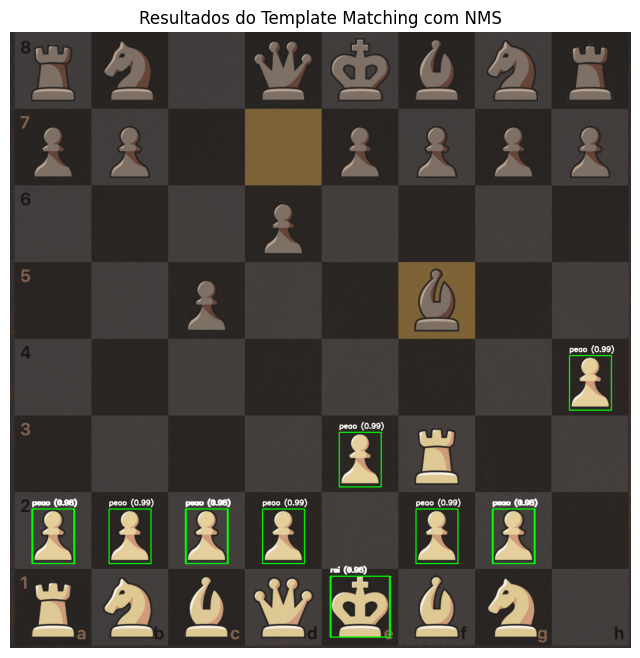

In [8]:
def draw_matches(tabuleiro, matches):
    
    for pt in matches:
        x, y, w, h = pt['x'], pt['y'], pt['w'], pt['h']
        nome = pt['name']
        conf = pt['confidence']

        cv2.rectangle(tabuleiro, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(tabuleiro, f'{nome} ({conf:.2f})', (x, y - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

    # Exibe o resultado
    plt.figure(figsize=(12, 8))
    plt.title("Resultados do Template Matching com NMS")
    plt.imshow(cv2.cvtColor(tabuleiro, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

draw_matches(tabuleiro, final_matches)

detectando todas peças temos o seguinte

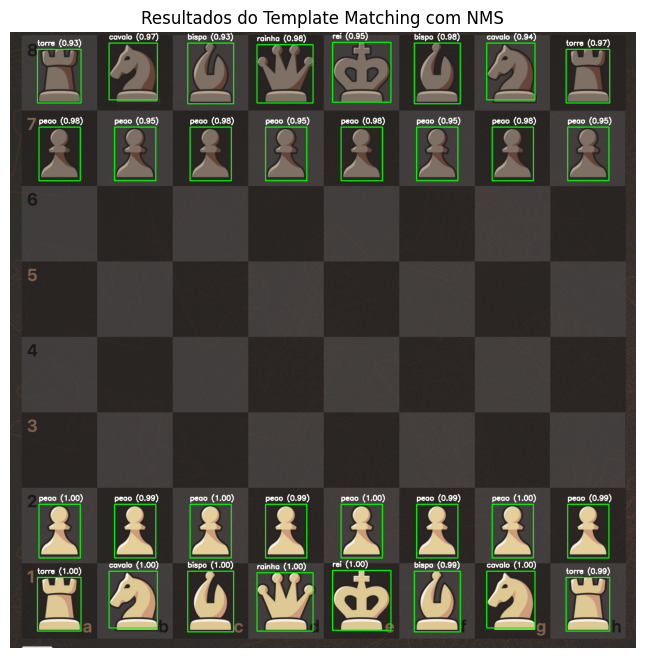

In [10]:

# Carrega tabuleiro
tabuleiro = cv2.imread('imgs/tabuleiro2.png')                     
tabuleiro_gray = cv2.cvtColor(tabuleiro, cv2.COLOR_BGR2GRAY)

# Carrega templates
templates = {
    'rei': cv2.imread('templates/rei.png', 0),
    'peao': cv2.imread('templates/peao.png', 0),
    'bispo': cv2.imread('templates/bispo.png', 0),
    'cavalo': cv2.imread('templates/cavalo.png', 0),
    'torre': cv2.imread('templates/torre.png', 0),
    'rainha': cv2.imread('templates/rainha.png', 0)
}

threshold = 0.93

matches = []
for nome, template in templates.items():
    resultados = template_matching(tabuleiro_gray, template, nome, threshold)
    matches.extend(resultados) # Adiciona os resultados de cada template à lista geral

final_matches = non_max_suppression(matches, overlap_threshold=0.3)

draw_matches(tabuleiro, final_matches)

ok. resolvemos um problema, mas arranjamos outro. 

Temos que diferenciar as pecas claras das escuras, para saber a qual jogador pertence.

Podemos tentar pela média de cor da peça

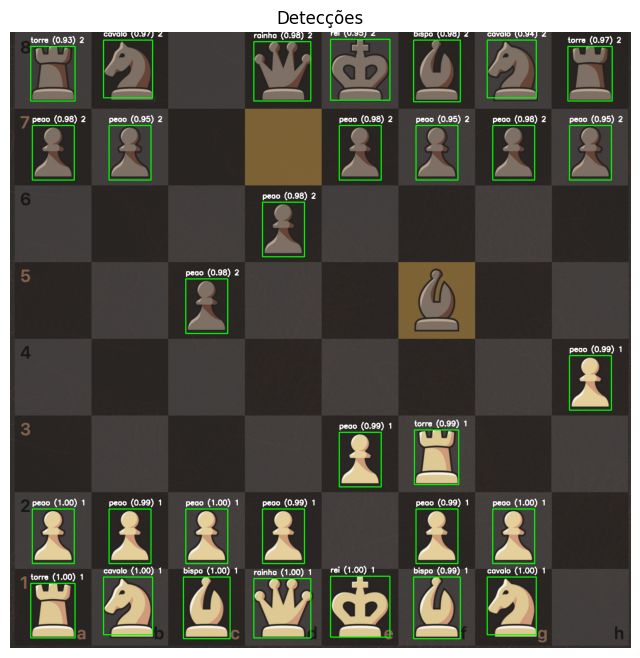

In [14]:
def template_matching2(tabuleiro_gray, template_gray, template_name,threshold, limiar):
    res = cv2.matchTemplate(tabuleiro_gray, template_gray, cv2.TM_CCOEFF_NORMED)
    
    loc = np.where(res >= threshold)

    
    matches = []
    for pt in zip(*loc[::-1]):  
        x, y = pt[0], pt[1]
        w, h = template_gray.shape[1], template_gray.shape[0]
        roi_gray = tabuleiro_gray[y:y+h, x:x+w]
        media = np.mean(roi_gray)
        time = 1 if media > limiar else 2
        
        matches.append({
            'x': x,
            'y': y,
            'w': w,
            'h': h,   
            'confidence': res[pt[1], pt[0]],
            'name': template_name,
            'time': time
            
        })          
    return matches


# Carrega tabuleiro
tabuleiro = cv2.imread('imgs/tabuleiro.png')                     
tabuleiro_gray = cv2.cvtColor(tabuleiro, cv2.COLOR_BGR2GRAY)

# Carrega templates
templates = {
    'rei': cv2.imread('templates/rei.png', 0),
    'peao': cv2.imread('templates/peao.png', 0),
    'bispo': cv2.imread('templates/bispo.png', 0),
    'cavalo': cv2.imread('templates/cavalo.png', 0),
    'torre': cv2.imread('templates/torre.png', 0),
    'rainha': cv2.imread('templates/rainha.png', 0)
}


threshold = 0.93
limiar = 100


matches = []
for nome, template in templates.items():
    resultados = template_matching2(tabuleiro_gray, template, nome, threshold, limiar)
    matches.extend(resultados) # Adiciona os resultados de cada template à lista geral

final_matches = non_max_suppression(matches, overlap_threshold=0.3)


# Exibe os resultados finais
for pt in final_matches:
    x, y, w, h = pt['x'], pt['y'], pt['w'], pt['h']
    nome = pt['name']
    conf = pt['confidence']
    time = pt['time']

    cv2.rectangle(tabuleiro, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.putText(tabuleiro, f'{nome} ({conf:.2f}) {time}', (x, y - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

plt.figure(figsize=(12, 8))
plt.title("Detecções")
plt.imshow(cv2.cvtColor(tabuleiro, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# draw_matches(tabuleiro, final_matches)

legal. já temos todas peças detectadas e separadas por tipo e por jogador.

proximos passos:

- detectar as posições do tabuleiro
- relacionar peças e posições
- adaptar e testar com video